In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


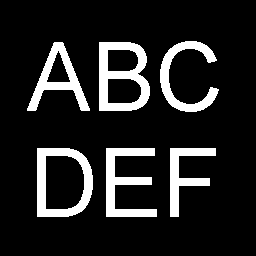

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/abcdef.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg, cmap = 'gray')
cv2_imshow(img)

In [5]:
numLabels, labels = cv2.connectedComponents(gImg)
print(numLabels)
print(labels.shape)
print(labels)

7
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


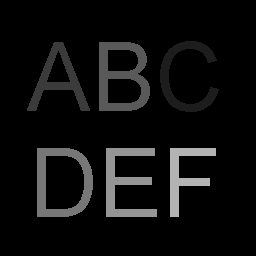

In [6]:
label_H = np.uint8(labels * 179 / np.max(labels))
cv2_imshow(label_H)

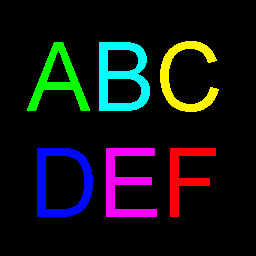

In [9]:
bank = 255*np.ones_like(label_H)
labelImg=cv2.merge([label_H, bank, bank])
labelImg = cv2.cvtColor(labelImg, cv2.COLOR_HSV2BGR)
labelImg[label_H==0] = 0
cv2_imshow(labelImg)

(256, 256, 3)


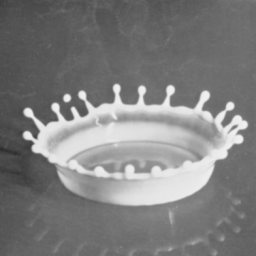

In [14]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg, cmap = 'gray')
cv2_imshow(img)

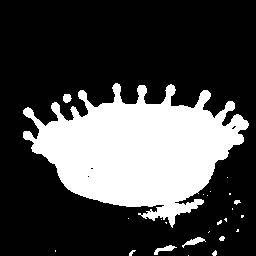

In [11]:
ret, thresh = cv2.threshold(gImg, 127, 255, 0)
cv2_imshow(thresh)

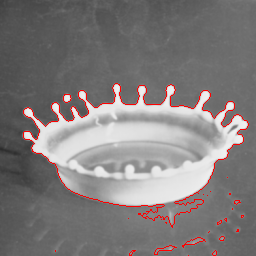

In [16]:
contour, hierachy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img1 = cv2.drawContours(img,contour, -1, (0, 0, 255), 1)
cv2_imshow(img1)